**Principal Component Analysis (PCA):** The idea of PCA is reduce the number of variables of a data set, while preserving as much information as possible.

In [192]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.utils.extmath import randomized_svd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler



DF = pd.read_csv('Heart Diseases Clean Grouped Last.csv')


In [193]:
DF.columns

Index(['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholestrol',
       'Fasting Blood Pressure > 120mg/dl', 'Rest ECG', 'Maximum Heart Rate',
       'Exercise Induced Angina', 'Exercise Induced ST Depression', 'Slope',
       'Number of Major Vessels', 'Thalassemia', 'Outcome'],
      dtype='object')

In [194]:
DF.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholestrol,Fasting Blood Pressure > 120mg/dl,Rest ECG,Maximum Heart Rate,Exercise Induced Angina,Exercise Induced ST Depression,Slope,Number of Major Vessels,Thalassemia,Outcome
0,63.0,Male,Typical Angina,145,233,True,Abnormal,150,No,2.3,Downsloping,0,Fixed Defect,No Heart Disease
1,67.0,Male,Asymptomatic,160,286,False,Abnormal,108,Yes,1.5,Flat,3,Normal,Heart Disease
2,67.0,Male,Asymptomatic,120,229,False,Abnormal,129,Yes,2.6,Flat,2,Reversable Defect,Heart Disease
3,37.0,Male,Non-anginal Pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Normal,No Heart Disease
4,41.0,Female,Atypical Angina,130,204,False,Abnormal,172,No,1.4,Upsloping,0,Normal,No Heart Disease


In [195]:
DF.iloc[:,1:].describe()

,Resting Blood Pressure,Cholestrol,Maximum Heart Rate,Exercise Induced ST Depression,Number of Major Vessels
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,131.689769,246.693069,149.607261,1.039604,0.663366
std,17.599748,51.776918,22.875003,1.161075,0.934375
min,94.000000,126.000000,71.000000,0.000000,0.000000
25%,120.000000,211.000000,133.500000,0.000000,0.000000
50%,130.000000,241.000000,153.000000,0.800000,0.000000
75%,140.000000,275.000000,166.000000,1.600000,1.000000
max,200.000000,564.000000,202.000000,6.200000,3.000000


In [196]:
DF.drop(['Chest Pain Type','Fasting Blood Pressure > 120mg/dl', 'Rest ECG','Exercise Induced Angina','Slope','Number of Major Vessels','Outcome'], axis=1, inplace=True)

In [197]:
DF.drop('Thalassemia', axis = 1, inplace = True)

In [198]:
DF.head()

,Age,Sex,Resting Blood Pressure,Cholestrol,Maximum Heart Rate,Exercise Induced ST Depression
0,63.0,Male,145,233,150,2.3
1,67.0,Male,160,286,108,1.5
2,67.0,Male,120,229,129,2.6
3,37.0,Male,130,250,187,3.5
4,41.0,Female,130,204,172,1.4


In [199]:

list_s = {"Male":1, "Female":0}
DF["Sex"].replace(list_s, inplace=True)
DF.head()

,Age,Sex,Resting Blood Pressure,Cholestrol,Maximum Heart Rate,Exercise Induced ST Depression
0,63.0,1,145,233,150,2.3
1,67.0,1,160,286,108,1.5
2,67.0,1,120,229,129,2.6
3,37.0,1,130,250,187,3.5
4,41.0,0,130,204,172,1.4


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

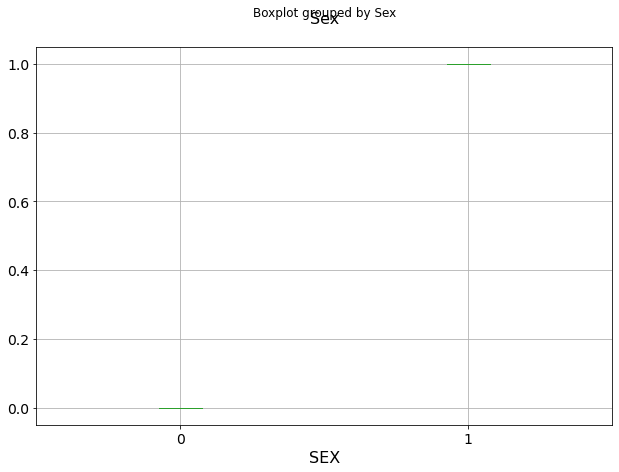

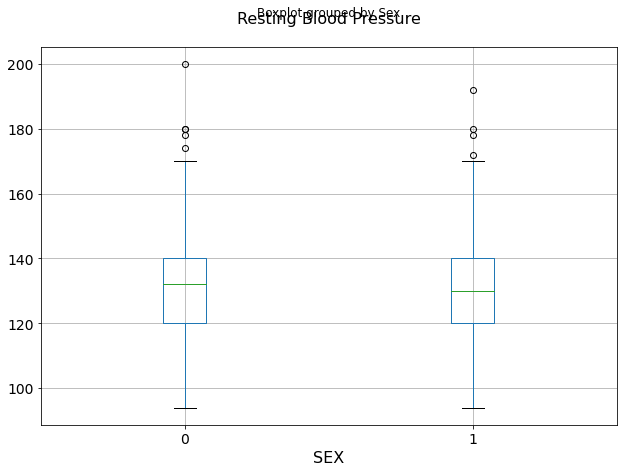

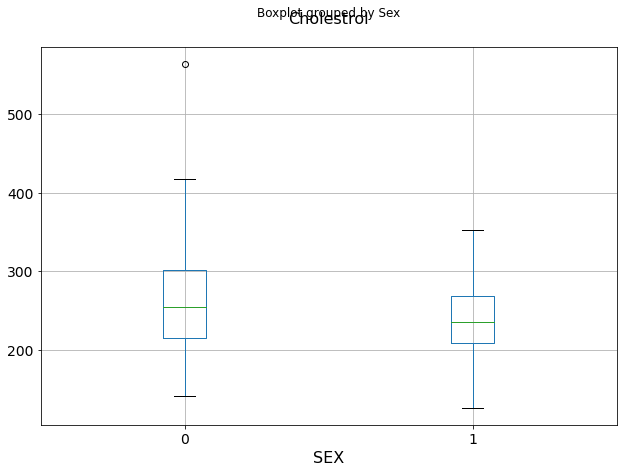

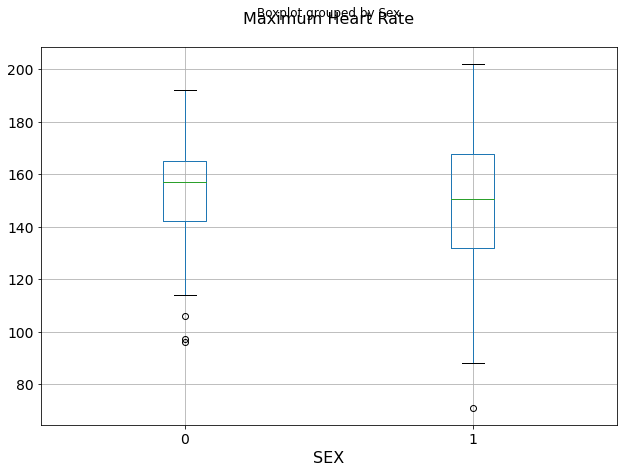

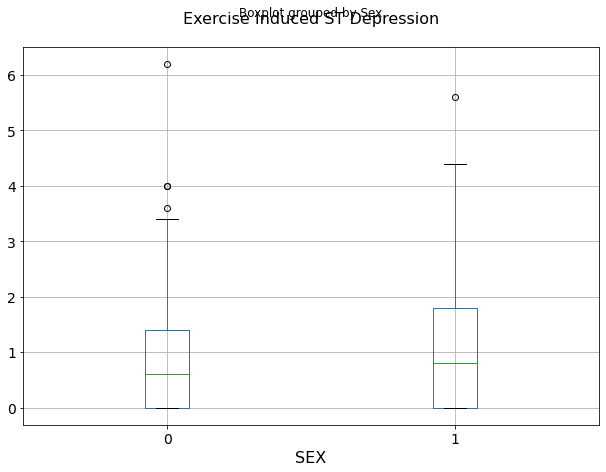

In [209]:
for c in DF.columns[1:]:
    DF.boxplot(c,by='Sex',figsize=(10,7),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("SEX", fontsize=16)

In [ ]:
scaler = StandardScaler()
X = DF.drop('Sex',axis=1)
y = DF['Sex']
X = scaler.fit_transform(X)
DFx = pd.DataFrame(data=X,columns=DF.columns[1:])


In [ ]:
DFx.head()

,Sex,Resting Blood Pressure,Cholestrol,Maximum Heart Rate,Exercise Induced ST Depression
0,0.948726,0.757525,-0.264900,0.017197,1.087338
1,1.392002,1.611220,0.760415,-1.821905,0.397182
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147
3,-1.932564,-0.096170,0.063974,1.637359,2.122573
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912


In [ ]:
DFx.describe()

,Sex,Resting Blood Pressure,Cholestrol,Maximum Heart Rate,Exercise Induced ST Depression
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,-1.538923e-17,4.259519e-16,2.418308e-16,-1.179841e-16,-1.700144e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.819115e+00,-2.145037e+00,-2.334877e+00,-3.442067e+00,-8.968617e-01
25%,-7.135564e-01,-6.652997e-01,-6.905030e-01,-7.053073e-01,-8.968617e-01
50%,1.729945e-01,-9.616980e-02,-1.101357e-01,1.485618e-01,-2.067053e-01
75%,7.270888e-01,4.729601e-01,5.476139e-01,7.178079e-01,4.834512e-01
max,2.500191e+00,3.887739e+00,6.138485e+00,2.294182e+00,4.451851e+00


In [ ]:
pca = PCA(n_components=None)
DFx_pca = pca.fit(DFx)

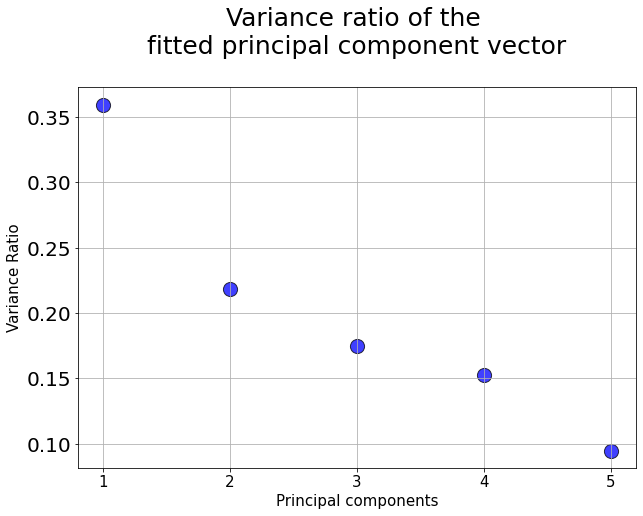

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=[i+1 for i in range(len(DFx_pca.explained_variance_ratio_))],
            y=DFx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='Blue',edgecolor='k')
plt.grid(True)
plt.title("Variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(DFx_pca .explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=20)
plt.ylabel("Variance Ratio",fontsize=15)
plt.show()

In [ ]:
DFx_trans = pca.transform(DFx)
DFx_trans = pd.DataFrame(data=DFx_trans)
DFx_trans.head()


,0,1,2,3,4
0,-1.264242,-0.091594,-0.777920,0.091672,-0.711645
1,-2.694890,0.363379,-0.052324,-0.671431,0.860806
2,-1.538935,-1.227560,0.525348,0.063151,-0.984175
3,0.954388,-0.108667,-1.234460,2.862250,-0.543482
4,1.431709,-0.403985,-1.012778,0.853656,0.007242


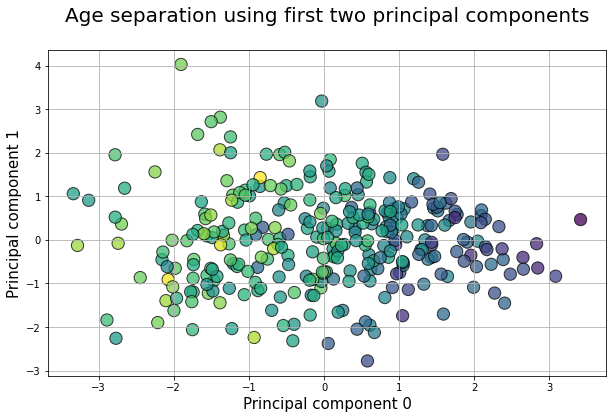

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(DFx_trans[0],DFx_trans[1],c=DF['Age'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Age separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component 0",fontsize=15)
plt.ylabel("Principal component 1",fontsize=15)
plt.show()

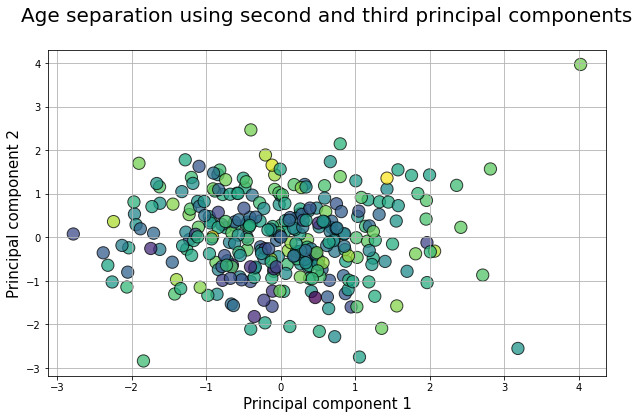

In [219]:
plt.figure(figsize=(10,6))
plt.scatter(DFx_trans[1],DFx_trans[2],c=DF['Age'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Age separation using second and third principal components\n",fontsize=20)
plt.xlabel("Principal component 1",fontsize=15)
plt.ylabel("Principal component 2",fontsize=15)
plt.show()

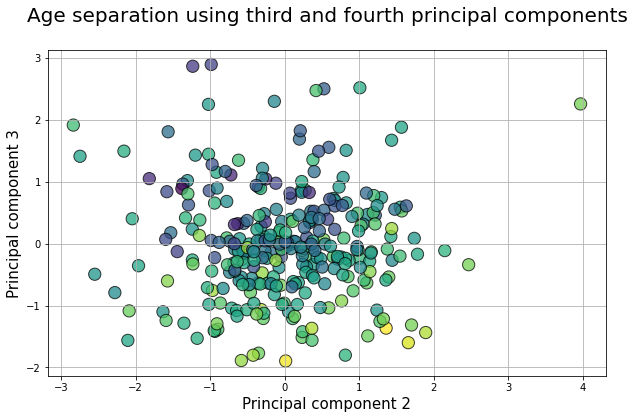

In [222]:
plt.figure(figsize=(10,6))
plt.scatter(DFx_trans[2],DFx_trans[3],c=DF['Age'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Age separation using third and fourth principal components\n",fontsize=20)
plt.xlabel("Principal component 2",fontsize=15)
plt.ylabel("Principal component 3",fontsize=15)
plt.show()

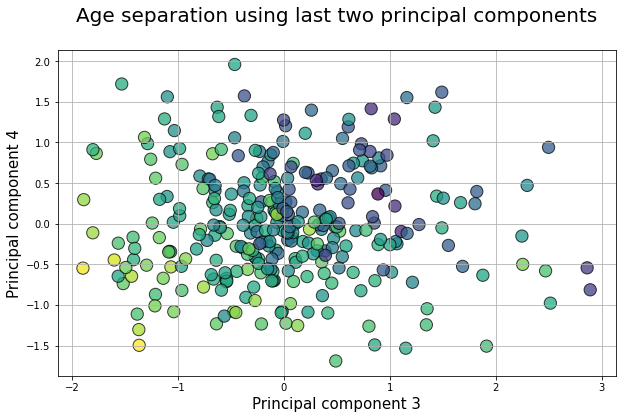

In [223]:
plt.figure(figsize=(10,6))
plt.scatter(DFx_trans[3],DFx_trans[4],c=DF['Age'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Age separation using last two principal components\n",fontsize=20)
plt.xlabel("Principal component 3",fontsize=15)
plt.ylabel("Principal component 4",fontsize=15)
plt.show()